# **Zillow Price Prediction Analysis**
# PROBLEM
It is not necessary to include this in your code file for the final project. However, this is a crucial phase and should be included in your presentation deck. I mention it here to emphasize its relevance and importance in the process.
### Problem Statement:
Zillow, a major player in real estate, has recently come under scrutiny due to significant fluctuations in housing prices in various regions, particularly in response to external factors like rising interest rates and inflation. These fluctuations have raised concerns about the accuracy of Zillow’s price prediction models, particularly their ability to provide reliable estimates for homes listed on the platform. Zillow’s leadership team has tasked the analytics team with analyzing historical housing data to understand the root causes of pricing inaccuracies and propose improvements to the pricing prediction model.

### Key Questions:
1. How accurate are Zillow's current price predictions compared to actual selling prices?
2. Which factors (e.g., area, number of bedrooms, bathrooms, etc.) have the most significant impact on price prediction errors?
3. Are there patterns of over- or under-prediction in specific areas or home types?
4. Do any model assumptions (e.g., linearity, multicollinearity) need to be addressed to improve prediction accuracy?
5. How can Zillow’s pricing algorithm be improved to adapt to current market volatility?

### Root Cause Analysis

1. **Why are Zillow’s pricing predictions sometimes inaccurate?**  
   Because the model does not account for all market conditions (e.g., sudden interest rate hikes, regional demand fluctuations).

2. **Why doesn't the model account for these market conditions?**  
   The current variables in the model (e.g., area, number of bedrooms, etc.) are not sufficient to capture dynamic market factors like economic shifts or buyer sentiment.

3. **Why weren’t more dynamic factors included in the model?**  
   Zillow’s initial model was built based on static historical data, without incorporating real-time data or external economic indicators.

4. **Why is the model dependent on static historical data?**  
   The original algorithm was designed with a focus on past trends rather than adaptive mechanisms that can adjust based on changing market conditions.

5. **Why hasn’t the model been updated to include adaptive features?**  
   The decision to update the model has been delayed due to the complexity of incorporating real-time data and the cost of implementing new algorithms.


# DATA

## Import Necessary Libraries
### What It Is:
This code imports essential libraries and modules needed for data manipulation, visualization, statistical analysis, and machine learning modeling. These libraries provide various tools and functions to perform tasks like data cleaning, plotting, building predictive models, and evaluating model performance.

### How It Works:
- **Pandas (`pd`)**: Used for data manipulation and analysis. It provides data structures like DataFrames to handle and analyze data efficiently.
- **NumPy (`np`)**: Provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays. It's often used for numerical operations on data.
- **Seaborn (`sns`)** and **Matplotlib (`plt`)**: These libraries are used for data visualization. Seaborn provides high-level functions to create attractive and informative statistical graphics, while Matplotlib is a more general-purpose plotting library.
- **Scikit-Learn**:
  - **`train_test_split`**: Splits the dataset into training and testing sets.
  - **`cross_val_score`**: Performs cross-validation to assess model performance.
  - **`LinearRegression`, `RidgeCV`, `LassoCV`, `ElasticNetCV`**: These are linear models for regression, including regularized versions (Ridge, Lasso, Elastic Net) that help prevent overfitting.
  - **`mean_squared_error`, `r2_score`**: Metrics used to evaluate the performance of regression models.
  - **`StandardScaler`**: Standardizes features by removing the mean and scaling to unit variance, which is crucial for models sensitive to the scale of data.
- **Statsmodels (`sm`)**: Used for statistical modeling and analysis. It provides functions for building and analyzing statistical models, such as Ordinary Least Squares (OLS) regression.

### Why It's Important:
Importing these libraries is a foundational step in data science and machine learning projects. They offer a wide range of functionalities needed to handle tasks such as data manipulation, visualization, building models, and evaluating their performance. By using these libraries, you can efficiently work with data, create visual insights, build robust predictive models, and perform statistical analyses, all essential for extracting meaningful information and making data-driven decisions.

In [ ]:
# Import libraries for data manipulation, visualization, and modeling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

## Data Loading
### What It Is:
This code loads a dataset from a CSV file into a pandas DataFrame and provides a quick overview of its structure and contents. This is an initial step in data analysis, allowing you to inspect the data and understand its variables, types, and overall structure.

### How It Works:
- **Load the Dataset**: `pd.read_csv('Housing.csv')` reads the CSV file named 'Housing.csv' into a pandas DataFrame called `dataset`. This function interprets the data in the file and loads it into a structured format that can be used for further analysis and manipulation.
- **Display the First Few Rows**: `display(dataset.head())` shows the first five rows of the dataset. This provides a quick glimpse of the data, including its columns, some sample values, and how the data is structured.
- **Check Dataset Info**: `dataset.info()` prints a summary of the dataset, including the number of rows and columns, the data types of each column, and the count of non-null values. This information helps identify which columns contain missing values, the data types of variables, and if any data preprocessing (like type conversion or missing value handling) is needed.

### Why It's Important:
Loading and inspecting the dataset is a crucial first step in any data analysis or machine learning project. It allows you to understand the data's format, identify potential issues such as missing values or incorrect data types, and get an initial sense of the variables you'll be working with. This initial exploration guides subsequent steps like data cleaning, preprocessing, and modeling, ensuring that you handle the dataset correctly and build robust models.

In [ ]:
# Load the dataset
dataset = pd.read_csv('Housing.csv')

# Display first few rows
display(dataset.head())

# Check dataset info
dataset.info()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## Data Cleaning
### What It Is:
This code cleans the dataset by handling missing values and removing duplicates. Cleaning data is an essential step in data preprocessing to ensure that the dataset is ready for analysis and modeling. It improves data quality, reduces biases, and helps prevent errors during the model training process.

### How It Works:
- **Replace Missing Values with NaN**: `dataset.replace('', np.nan, inplace=True)` replaces any empty strings in the dataset with `NaN` (Not a Number), a standard way to represent missing values in pandas. This makes it easier to identify and handle missing data consistently.
- **Impute Missing Numeric Variables**: The code iterates over all numeric columns (`float64` and `int64` types) and fills any `NaN` values with the median of the respective column. Using the median is robust against outliers and ensures that the imputed value does not skew the data distribution as much as the mean might.
- **Remove Duplicates**: `dataset.drop_duplicates(inplace=True)` checks for and removes any duplicate rows from the dataset. Duplicates can distort analysis and lead to biased results, so removing them ensures each observation is unique.
- **Display Cleaned Data**: `display(dataset.head())` shows the first few rows of the cleaned dataset, allowing you to verify that the data cleaning steps have been applied correctly.

### Why It's Important:
Handling missing values and removing duplicates are crucial steps in data cleaning. Missing values can lead to biased models or errors during training, and imputing them ensures that the dataset is complete. Using the median for imputation helps maintain the central tendency without being affected by outliers. Removing duplicates prevents redundant data from skewing the analysis, ensuring that the model learns from a clean and accurate dataset. Clean data is essential for building reliable and accurate predictive models.

In [ ]:
# Replace missing values with NaN and handle them
dataset.replace('', np.nan, inplace=True)

# Impute missing numeric variables with the median
for col in dataset.select_dtypes(include=['float64', 'int64']).columns:
    dataset[col].fillna(dataset[col].median(), inplace=True)

# Check for duplicates and remove them
dataset.drop_duplicates(inplace=True)

# Display the cleaned dataset
display(dataset.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Handling Categorical Variables
### What It Is:
This code converts categorical variables in the dataset into numerical form using one-hot encoding. One-hot encoding is a method of representing categorical data as binary columns, making it suitable for inclusion in regression models and other machine learning algorithms that require numerical input.

### How It Works:
- **One-Hot Encoding**: The `pd.get_dummies` function is used to convert each categorical variable into a series of binary columns (0s and 1s). For example, if a categorical variable has three categories, it will be converted into two binary columns (`drop_first=True` avoids the dummy variable trap by dropping one category to prevent multicollinearity).
- **Binary Columns**: For each category in the original categorical variable, a new binary column is created. If a row belongs to a category, the corresponding column gets a value of 1; otherwise, it gets a 0. This allows the machine learning model to understand and use categorical data.
- **View Encoded Data**: `dataset_encoded.head()` displays the first few rows of the newly encoded dataset, showing how the categorical variables have been transformed into a numerical format.

### Why It's Important:
Machine learning models like linear regression require numerical inputs to perform calculations. Categorical variables, in their original form, cannot be directly used in these models. One-hot encoding transforms these categorical variables into a numerical format that the model can understand. This step is crucial for incorporating categorical data into your predictive models, ensuring they can effectively learn from the dataset and make accurate predictions.

In [ ]:
# Convert categorical variables to numeric using one-hot encoding
# This will create binary columns for each category in the categorical variables
dataset_encoded = pd.get_dummies(dataset, drop_first=True)

# Display the first few rows of the encoded dataset
dataset_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


## Exploratory Data Analysis:
### What It Is:
This code generates three types of visualizations—box plots, a scatter plot matrix, and a correlation heatmap—to explore and understand the relationships, distributions, and correlations between numeric variables in the dataset. These plots help identify patterns, outliers, and the strength of relationships between variables, providing insights before building predictive models.

### How It Works:
- **Box Plot**:
  - **What It Does**: Creates a box plot for each numeric variable (`area`, `bedrooms`, `bathrooms`, `stories`, `parking`, `price`) to visualize the distribution, spread, and potential outliers.
  - **How It Works**: The data is reshaped using `pd.melt` to create a long-format DataFrame, which is passed to `sns.boxplot` for plotting. Each box shows the median, quartiles, and possible outliers for the variable, giving a quick overview of its distribution.
- **Scatter Plot Matrix**:
  - **What It Does**: Generates a scatter plot matrix to visualize pairwise relationships between the selected variables. This helps identify correlations and potential linear relationships.
  - **How It Works**: `sns.pairplot` creates scatter plots for every pair of variables in `scatter_columns`. Diagonal plots typically show the distribution of each variable, while the off-diagonal plots show relationships between pairs of variables, highlighting trends or patterns.
- **Correlation Heatmap**:
  - **What It Does**: Creates a heatmap of the correlation matrix to show the strength and direction of relationships between numeric variables.
  - **How It Works**: `dataset_encoded.corr()` calculates the correlation matrix, measuring how changes in one variable are associated with changes in another. `sns.heatmap` visualizes this matrix, with colors indicating the correlation strength. Annotated values help identify strongly correlated pairs, which is useful in feature selection and multicollinearity detection.

### Why It's Important:
Visualizations like box plots, scatter plot matrices, and correlation heatmaps are crucial in exploratory data analysis (EDA). They help identify outliers, understand variable distributions, and explore relationships between variables. Box plots can reveal skewness and outliers; scatter plot matrices show pairwise relationships; and correlation heatmaps identify correlated variables, guiding decisions in model building, feature selection, and potential data transformations.

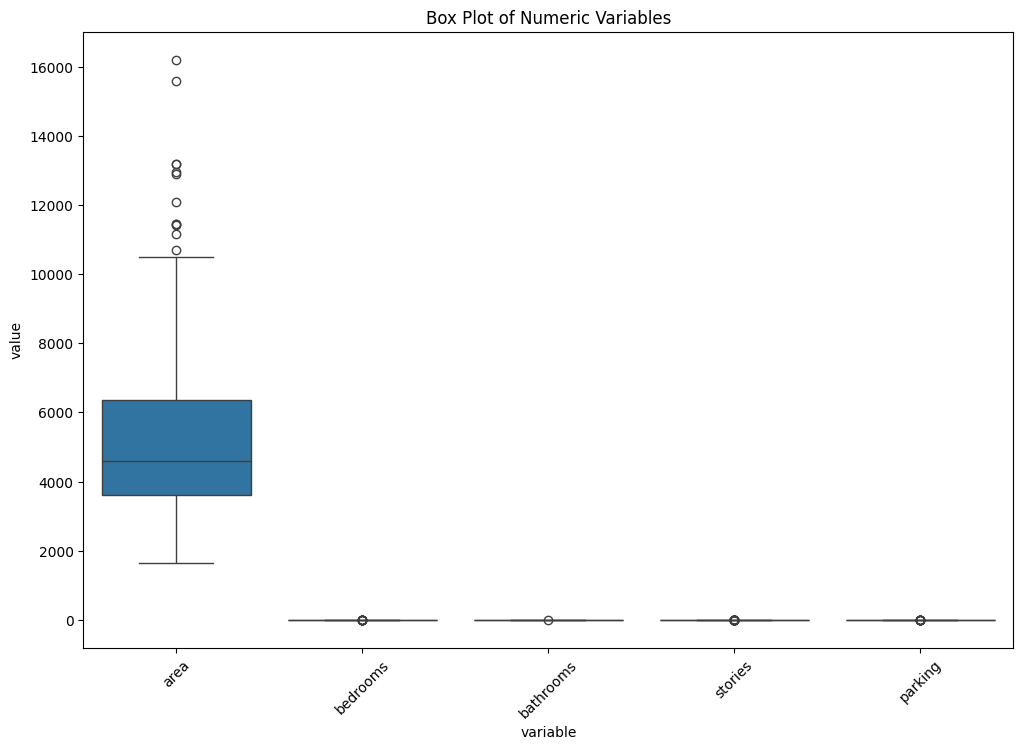

In [ ]:
# Box plot for numeric variables
numeric_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
dataset_long = pd.melt(dataset, id_vars=['price'], value_vars=numeric_columns)
plt.figure(figsize=(12, 8))  # Adjust the width and height as needed
sns.boxplot(x='variable', y='value', data=dataset_long)
plt.title('Box Plot of Numeric Variables')
plt.xticks(rotation=45)
plt.show()

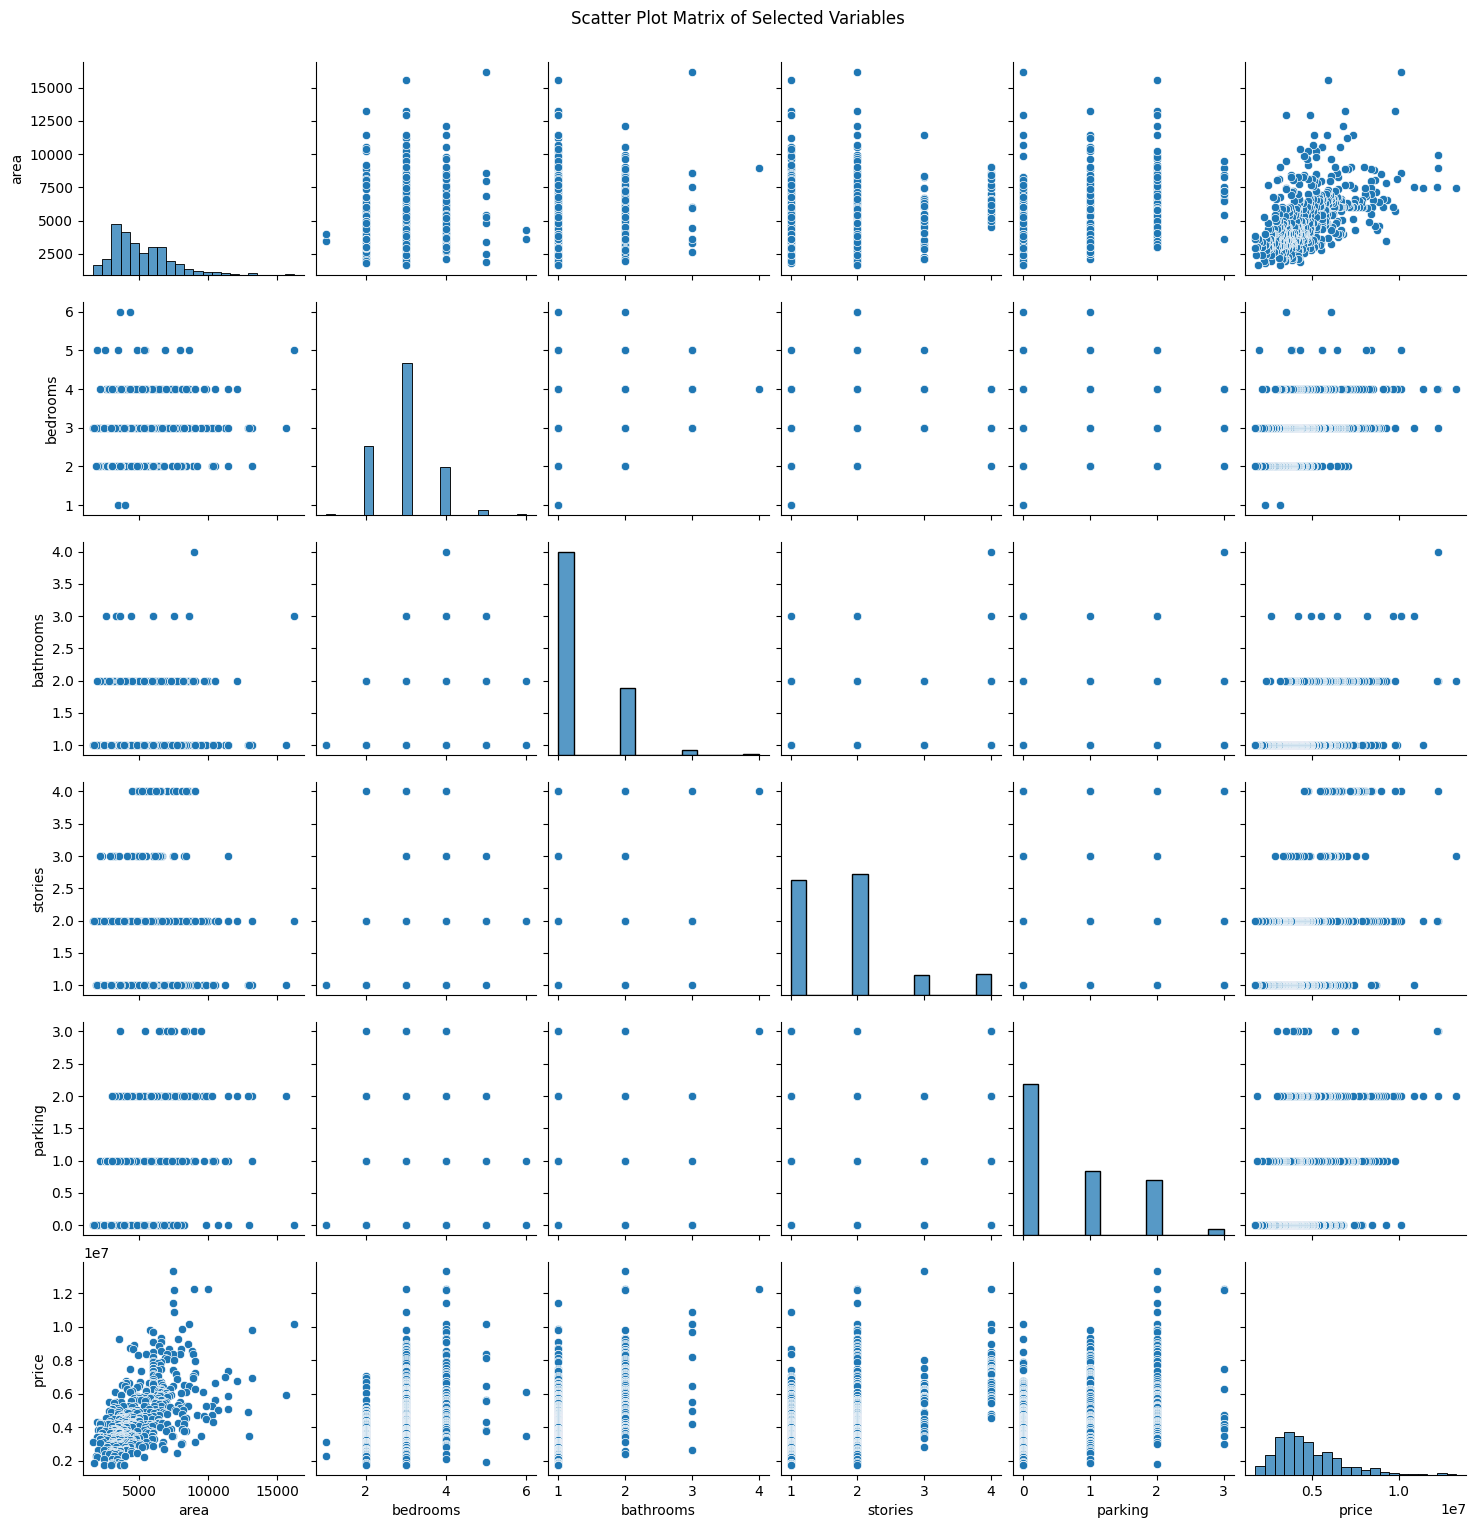

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter Plot Matrix
# Select the columns for the scatter plot matrix
scatter_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

# Create the scatter plot matrix
sns.pairplot(dataset[scatter_columns])
plt.suptitle('Scatter Plot Matrix of Selected Variables', y=1.02)  # Adjust the title position
plt.show()

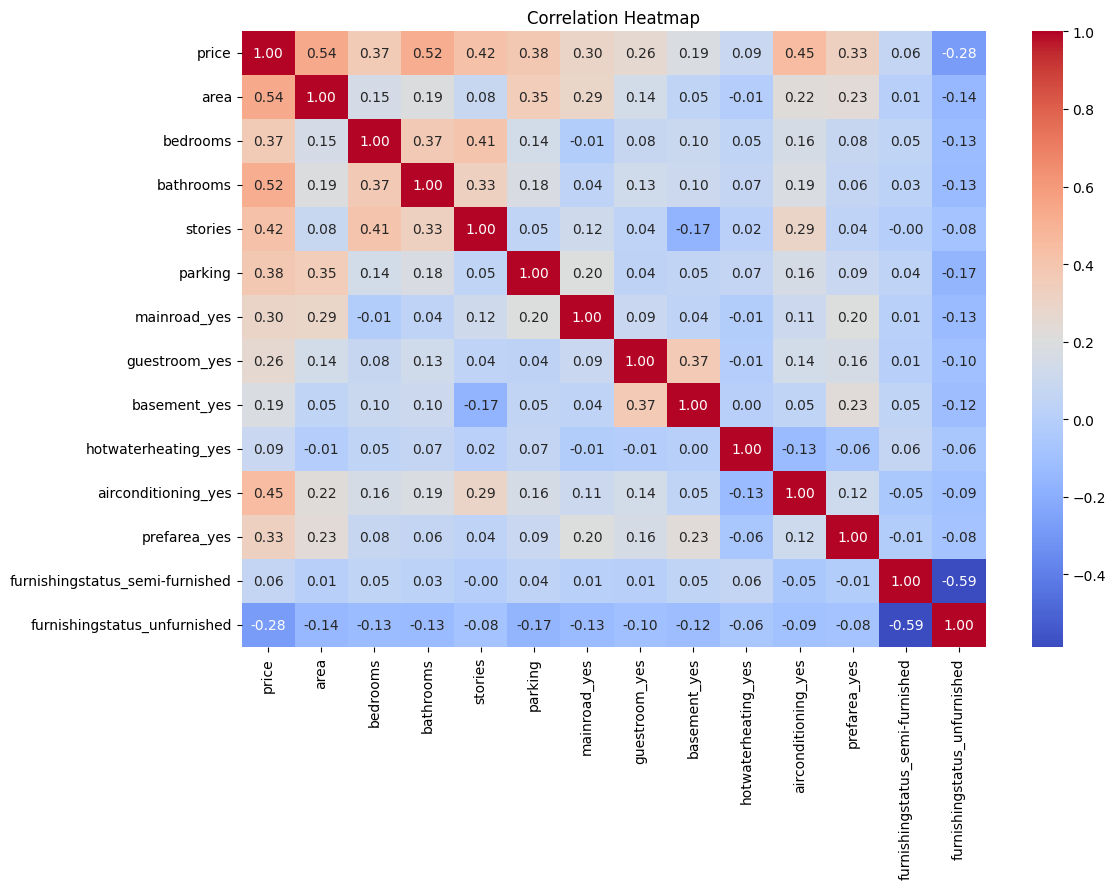

In [ ]:
# Correlation heatmap
corr_matrix = dataset_encoded.corr()
plt.figure(figsize=(12, 8))  # Adjust the width and height as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# MODEL

## Training Model
### What It Is:
This code preprocesses the dataset, splits it into training and testing sets, scales the features, and fits a Multiple Linear Regression model. This process is essential for building and evaluating a linear regression model that predicts a target variable based on several predictors.

### How It Works:
- **Convert Categorical Variables**: `pd.get_dummies(dataset, drop_first=True)` converts categorical variables into numerical form using one-hot encoding, creating binary columns for each category. This step is crucial because regression models require numerical input.
- **Split the Dataset**: The code splits the dataset into features (`X`) and the target variable (`y`). It then divides the data into training and testing sets, with 80% used for training and 20% for testing, ensuring the model is trained and evaluated on separate data.
- **Feature Scaling**: `StandardScaler` standardizes the features by removing the mean and scaling to unit variance. This step is important for linear regression, especially when the features have different scales, ensuring that each feature contributes equally to the model.
- **Fit the Multiple Linear Regression Model**: `LinearRegression().fit()` trains the model on the scaled training data, finding the best-fitting line that minimizes the sum of squared differences between the observed and predicted values.

### Why It's Important:
Preprocessing steps like one-hot encoding and feature scaling are vital to prepare the data for linear regression. Splitting the data into training and testing sets allows for an unbiased evaluation of the model's performance. By fitting the Multiple Linear Regression model, we can identify relationships between the predictors and the target variable, enabling predictions and insights into the factors influencing the outcome.

In [ ]:
# Convert categorical variables to numerical using one-hot encoding
dataset = pd.get_dummies(dataset, drop_first=True)

# Split the dataset into training and testing sets
X = dataset.drop('price', axis=1)
y = dataset['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the Multiple Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

## Training Model Output with OLS
### What It Is:
This code fits an Ordinary Least Squares (OLS) regression model using the `statsmodels` library and provides a detailed statistical summary of the model. OLS is a method for estimating the parameters in a linear regression model, giving insights into the relationship between the predictors and the target variable.

### How It Works:
- **Add a Constant (Intercept)**: The `sm.add_constant(X_train_scaled)` function adds an intercept term to the model, which represents the base value of the target variable when all predictors are zero. Including the intercept is essential for accurately modeling the relationship between the features and the target.
- **Fit the Model**: The code uses `sm.OLS()` to fit the OLS regression model to the training data (`X_train_const` and `y_train`). This method calculates the coefficients that minimize the sum of squared differences between observed and predicted values.
- **Print Model Summary**: `sm_model.summary()` outputs a comprehensive summary, including coefficients, standard errors, t-values, p-values, R-squared, and more. This summary provides detailed insights into how each predictor influences the target variable and how well the model fits the data.

### Why It's Important:
The OLS model summary gives a deeper understanding of the linear regression model. It shows which predictors significantly impact the target variable (based on p-values), how well the model fits the data (R-squared and Adjusted R-squared), and the statistical significance of the overall model. This detailed analysis helps in interpreting the model's results, understanding the underlying relationships, and making informed decisions about the model's validity and effectiveness.

In [ ]:
# # Add a constant (intercept) to the model
# X_train_const = sm.add_constant(X_train_scaled)

# # Fit the model using OLS
# sm_model = sm.OLS(y_train, X_train_const).fit()

# # Print the detailed model summary
# print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     72.17
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           1.70e-98
Time:                        13:58:25   Log-Likelihood:                -6662.8
No. Observations:                 436   AIC:                         1.335e+04
Df Residuals:                     422   BIC:                         1.341e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.739e+06    5.1e+04     92.869      0.0

## Modeling with Testing Data

### What It Is:
This code evaluates the performance of a linear regression model by making predictions on the test dataset and calculating key metrics, including Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared, and Adjusted R-squared. These metrics help assess how well the model predicts the target variable.

### How It Works:
- **Make Predictions**: The model makes predictions on the test data (`X_test_scaled`).
- **Calculate MSE and RMSE**:
  - **MSE** measures the average squared difference between actual and predicted values, indicating how well the model's predictions match the real data.
  - **RMSE** is the square root of MSE, providing an error metric in the same units as the target variable.
- **Calculate R-squared**: This metric shows the proportion of variance in the target variable explained by the model. An R-squared closer to 1 indicates a better fit.
- **Calculate Adjusted R-squared**: Adjusted R-squared accounts for the number of predictors in the model, providing a more accurate measure when comparing models with different numbers of features. It penalizes the model for including unnecessary predictors that do not improve model performance.

### Why It's Important:
These evaluation metrics provide a comprehensive understanding of the model's performance. RMSE gives insight into the average prediction error, while R-squared and Adjusted R-squared indicate how well the model explains the variance in the target variable. Adjusted R-squared is particularly important when using multiple predictors, as it adjusts for the number of features, helping to avoid overfitting.

In [ ]:
# Make predictions and evaluate
predictions = linear_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, predictions)

# Calculate Adjusted R-squared
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print("\nModel Performance on Test Set:")
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r_squared}')
print(f'Adjusted R-squared: {adjusted_r_squared}')


Model Performance on Test Set:
Mean Squared Error (MSE): 1220122964044.2415
Root Mean Squared Error (RMSE): 1104591.7635236294
R-squared: 0.6275652260137381
Adjusted R-squared: 0.5766004674682497


# ADVANCED CONCEPTS

## Regularization with Ridge, Lasso, and Elastic Net

### What It Is:
This code implements three regularized linear regression models: **Ridge Regression**, **Lasso Regression**, and **Elastic Net Regression**. These models add penalties to the model's coefficients to handle multicollinearity, reduce complexity, and prevent overfitting. Regularization improves model performance, especially when dealing with many features or correlated variables.

### How It Works:
- **Ridge Regression**: Adds an L2 penalty (squared coefficients) to shrink coefficients toward zero. The code uses `RidgeCV` to find the best regularization strength (`alpha`) using cross-validation. It reduces variance in models with correlated features without removing any features.
- **Lasso Regression**: Adds an L1 penalty (absolute coefficients), which can shrink some coefficients to exactly zero, effectively performing feature selection. `LassoCV` finds the best `alpha` using cross-validation. It is useful for identifying the most important features by eliminating irrelevant ones.
- **Elastic Net Regression**: Combines Lasso and Ridge by using both L1 and L2 penalties. `ElasticNetCV` finds the best `alpha` and `l1_ratio` to balance between the two penalties. This method is helpful when dealing with multiple correlated features, offering both shrinkage and feature selection.

### Why It's Important:
Regularization methods like Ridge, Lasso, and Elastic Net improve model performance by reducing overfitting and handling multicollinearity. They help create simpler, more interpretable models, especially in datasets with many features. By comparing RMSE and R-squared values, you can select the best regularization method for your dataset.

In [ ]:
# Ridge Regression
ridge_model = RidgeCV(alphas=np.logspace(-4, 4, 100), cv=10)
ridge_model.fit(X_train_scaled, y_train)
ridge_predictions = ridge_model.predict(X_test_scaled)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
ridge_r2 = r2_score(y_test, ridge_predictions)

# Output the results
print(f'Ridge RMSE: {ridge_rmse}')
print(f'Ridge R-squared: {ridge_r2}')

Ridge RMSE: 1097036.4817023845
Ridge R-squared: 0.6326426248582488


In [ ]:
# Lasso Regression
lasso_model = LassoCV(alphas=np.logspace(-4, 4, 100), cv=10)
lasso_model.fit(X_train_scaled, y_train)
lasso_predictions = lasso_model.predict(X_test_scaled)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))
lasso_r2 = r2_score(y_test, lasso_predictions)

print(f'Lasso RMSE: {lasso_rmse}')
print(f'Lasso R-squared: {lasso_r2}')

Lasso RMSE: 1106735.3551423121
Lasso R-squared: 0.6261183155241498


In [ ]:
# Elastic Net Regression
elasticnet_model = ElasticNetCV(alphas=np.logspace(-4, 4, 100), l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=10)
elasticnet_model.fit(X_train_scaled, y_train)
elasticnet_predictions = elasticnet_model.predict(X_test_scaled)
elasticnet_rmse = np.sqrt(mean_squared_error(y_test, elasticnet_predictions))
elasticnet_r2 = r2_score(y_test, elasticnet_predictions)

print(f'Elastic Net RMSE: {elasticnet_rmse}')
print(f'Elastic Net R-squared: {elasticnet_r2}')

Elastic Net RMSE: 1098113.2849960006
Elastic Net R-squared: 0.6319211068849788


## Outlier Removal with IQR
### What It Is:
This code defines a function called `remove_outliers` that uses the Interquartile Range (IQR) method to identify and remove outliers from a dataset. Outliers are data points that significantly deviate from the rest of the dataset and can skew the results of data analysis, especially in linear regression. By removing these extreme values, you can improve the accuracy and robustness of your model.

### How It Works:
1. **IQR Calculation**: For each specified column, the function calculates the 25th percentile (Q1) and the 75th percentile (Q3). The IQR is the difference between Q3 and Q1 and represents the middle 50% of the data.
2. **Define Boundaries**: It defines the lower and upper boundaries for outliers:
   - **Lower Bound**: \( Q1 - 1.5 * IQR \)
   - **Upper Bound**: \( Q3 + 1.5 * IQR \)
   - These boundaries help identify data points that lie significantly outside the interquartile range.
3. **Filter Data**: The function filters the dataset to include only data points that fall within these boundaries for each specified column. Data points outside these bounds are considered outliers and are removed.
4. **Return Cleaned Data**: The function returns a new DataFrame (`dataset_clean`) with outliers removed for the specified columns.

### Why It's Important:
Outliers can have a disproportionate effect on statistical analyses and models. In linear regression, outliers can skew the results, leading to misleading coefficients, inflated error metrics, and poor predictive performance. By using the IQR method to remove outliers, you ensure that the analysis focuses on the main body of the data, improving the model's reliability and interpretability. This method is robust and simple, providing a quick way to clean data and enhance the quality of your statistical models.


In [ ]:
# Define function to remove outliers using IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers
dataset_clean = remove_outliers(dataset, numeric_columns)
display(dataset_clean.describe())

,price,area,bedrooms,bathrooms,stories,parking
count,4.490000e+02,449.000000,449.000000,449.000000,449.000000,449.000000
mean,4.240488e+06,4718.636971,2.841871,1.202673,1.610245,0.561247
std,1.273933e+06,1783.747666,0.657669,0.424045,0.631737,0.768471
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.290000e+06,3480.000000,2.000000,1.000000,1.000000,0.000000
50%,4.123000e+06,4160.000000,3.000000,1.000000,2.000000,0.000000
75%,5.040000e+06,5985.000000,3.000000,1.000000,2.000000,1.000000
max,8.043000e+06,10500.000000,4.000000,3.000000,3.000000,2.000000


## Assumptions of Multiple Linear Regression
### What It Is:
This code visually and statistically checks the assumptions of multiple linear regression (MLR). In linear regression, several assumptions must be satisfied for the model to be valid and reliable. This code helps verify these assumptions, including linearity, homoscedasticity, normality of residuals, independence, and multicollinearity.

### How It Works:
1. **Linearity**: A scatter plot of actual versus predicted values is created to assess the linearity assumption. Ideally, the points should be close to the red identity line, indicating a linear relationship between the features and the target variable.
2. **Homoscedasticity**: The residuals (errors) are plotted against the predicted values. This plot helps check if the variance of residuals is constant across all levels of predicted values. If the residuals scatter randomly around the horizontal line (zero), it indicates homoscedasticity.
3. **Normality of Residuals**: A Q-Q plot is generated to check if the residuals follow a normal distribution. In this plot, residuals should roughly follow the 45-degree line, suggesting that they are normally distributed.
4. **Independence**: The Durbin-Watson test statistic is calculated to check for autocorrelation in residuals. Values close to 2 suggest that the residuals are independent, which is an essential assumption in linear regression.
5. **Multicollinearity**: The Variance Inflation Factor (VIF) is calculated for each feature to detect multicollinearity. VIF values greater than 5 or 10 indicate that the feature has a high correlation with other features, which can distort the model's coefficients.

### Why It's Important:
Verifying these assumptions is crucial to ensure the reliability of a multiple linear regression model. If the assumptions are violated, the model's estimates and predictions may not be trustworthy. For example, if the residuals are not homoscedastic or normally distributed, it suggests that the model may not be capturing the relationship between variables correctly. Multicollinearity can inflate the variance of the coefficient estimates, making it hard to determine the individual effect of each predictor. By checking these assumptions, you can diagnose potential issues with the model and make necessary adjustments, ensuring that the linear regression results are both valid and interpretable.

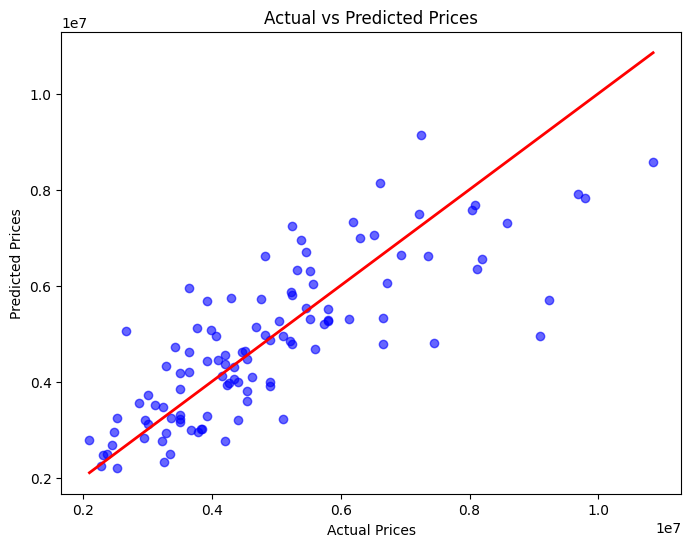

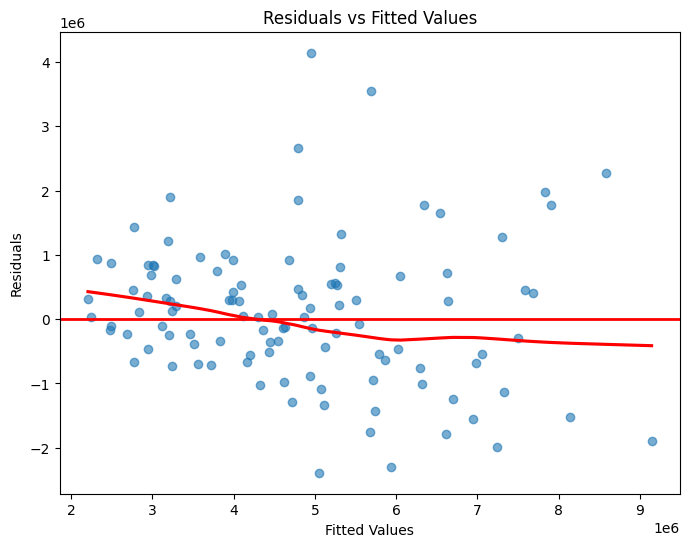

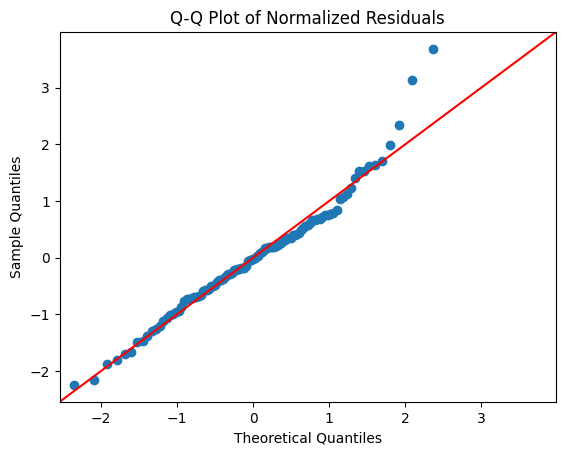

Durbin-Watson test statistic: 2.1041659382427014
                            Feature       VIF
0                              area  1.350405
1                          bedrooms  1.397139
2                         bathrooms  1.329829
3                           stories  1.484474
4                           parking  1.191079
5                      mainroad_yes  1.172405
6                     guestroom_yes  1.232234
7                      basement_yes  1.336322
8               hotwaterheating_yes  1.044068
9               airconditioning_yes  1.214805
10                     prefarea_yes  1.149497
11  furnishingstatus_semi-furnished  1.605024
12     furnishingstatus_unfurnished  1.687121


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Visualization for MLR Assumptions

# Linearity (scatter plot of actual vs predicted values)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Identity line
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Homoscedasticity (residual plot)
residuals = y_test - predictions
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(0, color='red', linewidth=2)
sns.regplot(x=predictions, y=residuals, scatter=False, lowess=True, color='red')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Normality of Residuals (Q-Q plot)
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import zscore

normalized_residuals = zscore(residuals)
sm.qqplot(normalized_residuals, line='45')
plt.title('Q-Q Plot of Normalized Residuals')
plt.show()
# print("Residuals:", residuals[:10])  # Print the first 10 residuals to inspect

# Independence
# Perform the Durbin-Watson test
from statsmodels.stats.stattools import durbin_watson
dw_test = durbin_watson(residuals)
print(f"Durbin-Watson test statistic: {dw_test}")

# Multicollinearity (VIF)
# Adding a constant for VIF calculation
X_train_const = sm.add_constant(X_train_scaled)
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_train_const, i) for i in range(1, X_train_const.shape[1])]  # Starting at 1 to skip the constant
print(vif)


## Cross-Validation
### What It Is:
This code uses 10-fold cross-validation to evaluate the performance of a multiple linear regression model. Cross-validation is a technique used to assess how well a model generalizes to new, unseen data by splitting the dataset into multiple subsets (folds) and performing repeated training and evaluation. This approach provides a more robust estimate of the model's performance than a single train-test split.

### How It Works:
- **Set Up Cross-Validation**: Initializes a linear regression model and sets up 10-fold cross-validation. The data is split into 10 subsets, and the model is trained 10 times, each time using a different subset for validation.
- **Cross-Validation Metrics**:
  - **RMSE (Root Mean Squared Error)**: `cross_val_score` calculates the negative mean squared error for each fold. Taking the square root and averaging gives the mean RMSE across all folds, indicating the average prediction error.
  - **R-squared**: `cross_val_score` also calculates R-squared for each fold, which measures how well the model explains the variance in the target variable. The mean R-squared across folds provides an overall measure of model performance.
- **Predictions and Summary**:
  - **Cross-Validated Predictions**: `cross_val_predict` generates predictions for each data point using cross-validation, ensuring each prediction is made by a model that didn't see that data point during training.
  - **Evaluate Predictions**: Calculates the RMSE and R-squared for the cross-validated predictions on the entire training set, offering a summary of the model's performance.

### Why It's Important:
Cross-validation is essential for evaluating the performance and generalizability of a model. It helps detect overfitting by assessing how the model performs on different subsets of the data. Using metrics like RMSE and R-squared across multiple folds provides a more reliable estimate of model accuracy, ensuring that the model is not just fitting the training data but can also perform well on new, unseen data. This makes cross-validation a crucial step in building robust and reliable predictive models.

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Set up 10-fold cross-validation
linear_model = LinearRegression()

# Fit the Multiple Linear Regression Model with cross-validation
# Performing cross-validation and calculating RMSE for each fold
cv_rmse = np.sqrt(-cross_val_score(linear_model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error'))
cv_r2 = cross_val_score(linear_model, X_train_scaled, y_train, cv=10, scoring='r2')

# Calculate the mean RMSE and R-squared across all folds
mean_cv_rmse = np.mean(cv_rmse)
mean_cv_r2 = np.mean(cv_r2)

print(f"Mean Fold Cross-validated RMSE: {mean_cv_rmse}")
print(f"Mean Fold Cross-validated R-squared: {mean_cv_r2}")

# View model summary using cross-validation predictions
# Getting predictions using cross-validation
cv_predictions = cross_val_predict(linear_model, X_train_scaled, y_train, cv=10)

# Evaluating the cross-validated model performance
cv_rmse_summary = np.sqrt(mean_squared_error(y_train, cv_predictions))
cv_r2_summary = r2_score(y_train, cv_predictions)

print(f"Cross-validated RMSE (Summary): {cv_rmse_summary}")
print(f"Cross-validated R-squared (Summary): {cv_r2_summary}")


Mean Fold Cross-validated RMSE: 1068682.843553807
Mean Fold Cross-validated R-squared: 0.6657089196481143
Cross-validated RMSE (Summary): 1081859.725069319
Cross-validated R-squared (Summary): 0.6695950848249688


# IMPACT
It is not necessary to include this in your code file for the final project. However, this is a crucial phase and should be included in your presentation deck. I mention it here to emphasize its relevance and importance in the process.

Go back to the mini case and focus on answering the questions. Share your findings and provide a managerial recommendation. Two sentences should suffice for each. "We find..." and "Therefore, we suggest..." Try to connect some part of the managerial recommendation to your 5 Whys drivers. Once complete, we will debrief this mini case as a group.